### Author: Mohsen Ghazel (mghazel)
* Date: March 29th, 2021

# **Project: Image Features Detection**

The objective of this project is to demonstrate how to detect various types of image features using OpenCV with Python API:

These features, include:

* Harris corners
* FAST
* BRIEF
* ORB

We shall assess these various types of features in terms of the type of information each feature captures or extracts from the image


In [ ]:
print(__doc__)

Automatically created module for IPython interactive environment


##**Step 1: Python imports**



In [2]:
# system environment
import sys
# I/O
import os
# OpenCV
import cv2
# Numpy
import numpy as np
# matplotlib
import matplotlib.pyplot as plt
# image processing library
import matplotlib.image as mpimg
# date and time
import datetime

# check for successful package imports and versions
# python
print("Python version : {0} ".format(sys.version))
# OpenCV
print("OpenCV version : {0} ".format(cv2.__version__))
# numpy
print("Numpy version  : {0}".format(np.__version__))

Python version : 3.7.10 (default, Feb 20 2021, 21:17:23) 
[GCC 7.5.0] 
OpenCV version : 4.1.2 
Numpy version  : 1.19.5


##**Step 2: Read and visualize the input image**

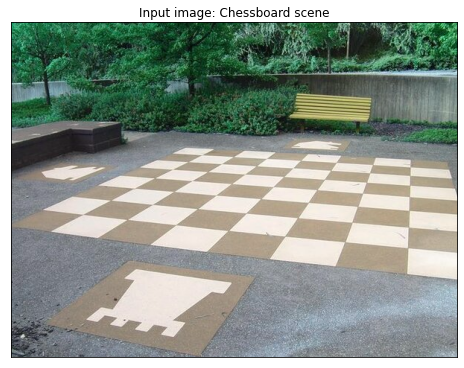

In [8]:
# The input image file name
img_file_path_name = os.path.join("sample_data","chessboard-scene.jpg")
# read the input image
img = cv2.imread(img_file_path_name)

# check if the image is read successfully
if img is None:
    sys.exit("Could not read the image file: " + img_file_path_name)

# check if it is grayscale image, if so convert it to RGB by 
# duplicating the channel
if (len(img.shape) == 2):
  img = np.uint8(cv2.merge([img,img,img]))

# check if it is color image, if so convert it to grayscale
if (len(img.shape) > 2):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
else: # make a copy of the image
    gray = img.copy()

# display the input image 
# create a figure
plt.figure("Input image: Chessboard scene",figsize=(8,8))
# display the original image
plt.subplot(111)
plt.title("Input image: Chessboard scene", fontsize = 12)
plt.xticks([]), plt.yticks([])
# display the original image
# - if the image is RGB
if (len(img.shape) > 2):
    plt.imshow(img);
else: # for grayscale image
    plt.imshow(img, cmap='gray');

##**Step 3: Harris corners**

* Harris Corner Detector extracts corner-like features from the image:
  * A corner is typically located at the intersection of 2 edge-lines.

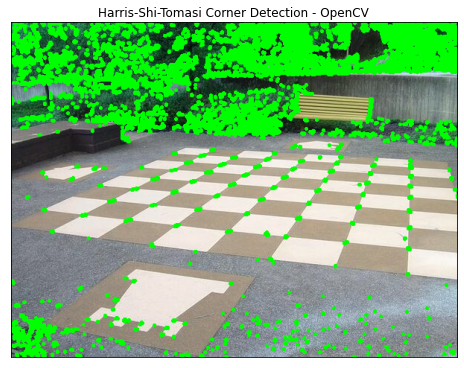

In [9]:
#===============================================================================
# 3) Harris-Corners detection
#===============================================================================
# make a copy of the image
copy = img.copy();

# convert the image to float32
gray = np.float32(gray)

# apply the Harris corner
dst = cv2.cornerHarris(gray,2,3,0.04)

# dilate the initial detections to remove unimportant corners
dst = cv2.dilate(dst,None)

# Threshold the detected corners:
# - the optimal threshold value, it may vary depending on the image.
yy,xx = np.where(dst>0.01*dst.max())

# visualize the final corner detections 
for counter in range(xx.shape[0]):
    # get the x-coordinate
    x = xx[counter]
    # get the x-coordinate
    y = yy[counter]
    # draw a BLUE circle at the point (x,y)
    cv2.circle(copy,(x,y),1,(0,255,0),-1)

# visualize the figure
plt.figure(figsize = (8, 8))
plt.subplot(111)
# figure title
plt.title("Harris-Shi-Tomasi Corner Detection - OpenCV", fontsize=12)
# axis off
plt.xticks([]), plt.yticks([])
# diplay the image with overlays
plt.imshow(copy);

##**Step 4: FAST features**
 
* FAST (Features from Accelerated Segment Test) algorithm:
  * It is several times faster than other existing corner detectors
  There are several feature detectors and many of them are really good. 
  * More suitable for real-time applications
  * But it is generally not robust to high levels of noise. 

Threshold:  10
nonmaxSuppression:  True
neighborhood:  2
Total Keypoints with nonmaxSuppression:  10964
Total Keypoints without nonmaxSuppression:  29157


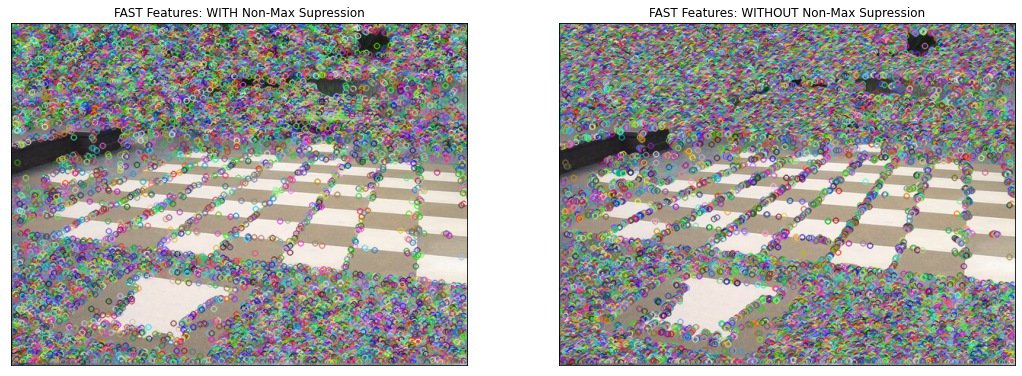

In [11]:
#===============================================================================
# 4) FAST - Features from Accelerated Segment Test
#===============================================================================
# make a copy of the image
copy = img.copy();

# Initiate FAST object with default values
fast = cv2.FastFeatureDetector_create()

# comute the keypoints
kp = fast.detect(copy,None)
# draw the keypoints
img2 = cv2.drawKeypoints(copy, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Print default params
print("Threshold: ", fast.getThreshold())
print("nonmaxSuppression: ", fast.getNonmaxSuppression())
print("neighborhood: ", fast.getType())
print("Total Keypoints with nonmaxSuppression: ", len(kp))

# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)
# recompute the keypoints
kp = fast.detect(copy,None)
print("Total Keypoints without nonmaxSuppression: ", len(kp))
# overlay the results without nonmaxSuppression
img3 = cv2.drawKeypoints(copy, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# visualize the results
plt.figure(figsize=(18, 8))
# FAST Features with Non-Max Supression
plt.subplot(121)
plt.title("FAST Features: WITH Non-Max Supression", fontsize=12)
plt.xticks([]), plt.yticks([])
plt.imshow(img2)
# FAST Features without Non-Max Supression
plt.subplot(122)
plt.title("FAST Features: WITHOUT Non-Max Supression", fontsize=12)
plt.xticks([]), plt.yticks([])
plt.imshow(img3);


##**Step 5: BRIEF features**

* BRIEF is a faster method feature descriptor calculation and matching. 
* It also provides high recognition rate unless there is large in-plane rotation. 
* One important point is that BRIEF is a feature descriptor, it doesn’t provide any method to find the features. 
So you will have to use any other feature detectors like SIFT, SURF etc. 


Descriptor Size :  32
Descriptor Shape :  (336, 32)


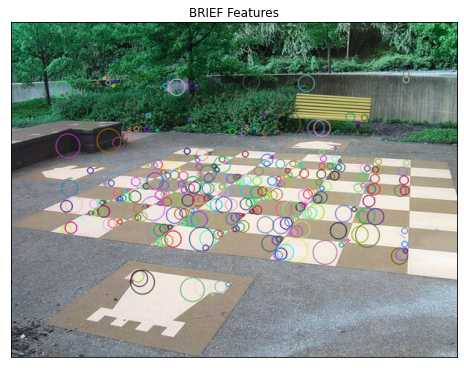

In [13]:
#===============================================================================
# 5) BRIEF - Binary Robust Independent Elementary Features
#===============================================================================
# make a copy of the image
copy = img.copy();
# Initiate BRIEF detector
star = cv2.xfeatures2d.StarDetector_create()

# Initiate BRIEF extractor
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

# find the keypoints with STAR
kp = star.detect(copy ,None)

# compute the descriptors with BRIEF
kp, des = brief.compute(copy , kp)

print("Descriptor Size : ", brief.descriptorSize())
print("Descriptor Shape : ", des.shape)

cv2.drawKeypoints(copy,kp,copy,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize = (8, 8))
plt.subplot(111)
plt.title("BRIEF Features", fontsize = 12)
plt.xticks([]), plt.yticks([])
plt.imshow(copy);

##**Step 6: ORB features**

* ORB is basically a fusion of FAST keypoint detector and BRIEF descriptor with many modifications to enhance the performance. 
  * First it use FAST to find keypoints, then apply Harris corner measure to find top N points among them. 
  * It also use pyramid to produce multiscale-features. 

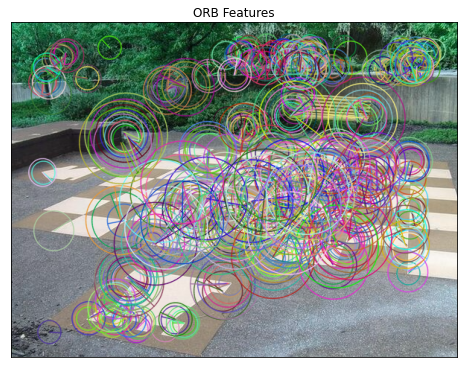

In [14]:
#===============================================================================
# 6) ORB - Oriented FAST and Rotated BRIEF
#===============================================================================
# make a copy of the image
copy = img.copy();
# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints with ORB
kp = orb.detect(copy,None)

# compute the descriptors with ORB
kp, des = orb.compute(copy, kp)

# draw only keypoints location,not size and orientation
cv2.drawKeypoints(copy, kp, copy, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(8,8))
plt.subplot(111)
plt.title("ORB Features", fontsize = 12)
plt.xticks([]), plt.yticks([])
plt.imshow(copy);

##**Step 7: End of Execution**
* Display a successful end of execution message

In [ ]:
# display a final message
# current time
now = datetime.datetime.now()
# display a message
print('Program executed successfully on: '+ str(now.strftime("%Y-%m-%d %H:%M:%S") + "...Goodbye!\n"))

Program executed successfully on: 2021-03-31 00:02:54...Goodbye!

